In [1]:
%load_ext autoreload
%autoreload 2
%cd -q ../scripts/
from default_param import *

print('Figure width={}in'.format(fig_width))

%matplotlib inline

Figure width=6.226650062266501in


## testing contrast and duration

### main experimental script

Let's test a range of different contrasts:

In [2]:
np.logspace(-.8, 0.15, 10, endpoint=True, base=16)

array([ 0.1088,  0.1458,  0.1954,  0.2618,  0.3508,  0.4701,  0.63  ,
        0.8441,  1.1311,  1.5157])

In [3]:
im_contrasts = mp.im_contrast*np.logspace(-.6, .125, 9, endpoint=True, base=16)
im_contrasts / mp.im_contrast

array([ 0.1895,  0.2436,  0.3132,  0.4026,  0.5176,  0.6655,  0.8556,
        1.1   ,  1.4142])

In [ ]:
%%writefile experiment_contrast.py
import MotionParticles as mp
gen_dot = mp.generate_dot
import numpy as np
import matplotlib.pyplot as plt
import os
from default_param import *

image_contrast = {}
experiment = 'contrast'

if True:
    im_contrasts = mp.im_contrast*np.logspace(-.6, .125, 9, endpoint=True, base=16)[1:-1]
    for stimulus_tag, im_arg in zip(stim_labels, stim_args):
        # generating the movie
        image_contrast[stimulus_tag] = {}
        image_contrast[stimulus_tag]['args'] = im_arg
        #image_contrast[stimulus_tag]['args'] = {'Y_0':0,  'noise':noise,  'dot_size':dot_size}
        image_contrast[stimulus_tag]['im'] = gen_dot(N_X=N_X, N_Y=N_Y, N_frame=N_frame, **image_contrast[stimulus_tag]['args'])
        image_contrast[stimulus_tag]['result'] = {}
        # running PX and MBP 
        #for D_x, D_V, v_prior, label in zip([mp.D_x, PBP_D_x], [mp.D_V, PBP_D_V], [mp.v_prior, PBP_prior], ['MBP', 'PBP']):
        for D_x, D_V, v_prior, label in zip([mp.D_x], [mp.D_V], [mp.v_prior], ['MBP']):
            figname = os.path.join(mp.figpath, experiment + '-' + stimulus_tag + '-' + label)
            #print(figname)

            image_contrast[stimulus_tag]['result'][label] = {}
            image_contrast[stimulus_tag]['args'].update(D_V=D_V, D_x=D_x, v_prior=v_prior)
            kwargs_variable  = mp.figure_image_variable(
                    figname, 
                    N_X, N_Y, N_frame, gen_dot, order=None, do_figure=do_figure, do_video=do_video, 
                    N_quant_X=N_quant_X, N_quant_Y=N_quant_Y,
                    fixed_args=image_contrast[stimulus_tag]['args'], 
                    im_contrast=im_contrasts)

            for new_kwargs in kwargs_variable:
                if True: #try:
                    matname = mp.make_figname(figname, new_kwargs).replace(mp.figpath, mp.matpath) + '.npy'
                    particles = np.load(matname)
                    image_contrast[stimulus_tag]['result'][label][new_kwargs['im_contrast']] = particles
                    #print(particles.shape)
                    print('>>> Stimulus ', stimulus_tag, label, ' at contrast= ', new_kwargs['im_contrast'] )
                    fig, axs = mp.spatial_readout(particles, N_quant_X=N_quant_Y, N_quant_Y=1)#, fig=fig, a=axs[i])
                    plt.show()

                #except:
                #    print('no result yet for ', matname)

if True:                
    experiment = 'duration'
    flash_durations = np.array([.03, .05, .08, .13, .25])
    flash_starts = .5 - flash_durations/2
    #print(stim_labels[1], stim_args[1], flash_durations, flash_starts)
    #for stimulus_tag, im_arg in zip(stim_labels[1], stim_args[1]):
    stimulus_tag, im_arg = stim_labels[1], stim_args[1]
    image_duration = {}
    image_duration[stimulus_tag] = {}
    image_duration[stimulus_tag]['args'] = im_arg
    #print(stimulus_tag, im_arg)
    image_duration[stimulus_tag]['result'] = {}
    # running PX and MBP with 2 different latencies
    #for D_x, D_V, v_prior, label in zip([mp.D_x, PBP_D_x], [mp.D_V, PBP_D_V], [mp.v_prior, PBP_prior], ['MBP', 'PBP']):
    label = 'MBP'
    figname = os.path.join(mp.figpath, experiment + '-' + stimulus_tag + '-' + label)
    image_duration[stimulus_tag]['result'][label] = {}
    kwargs_variable  = mp.figure_image_variable(
            figname, 
                N_X, N_Y, N_frame, gen_dot, order=None, do_figure=do_figure, do_video=do_video, N_quant_X=N_quant_X, N_quant_Y=N_quant_Y,
            fixed_args=image_duration[stimulus_tag]['args'], 
            flash_start=flash_starts, flash_duration=flash_durations)

    for new_kwargs in kwargs_variable:
        try:
            matname = mp.make_figname(figname, new_kwargs).replace(mp.figpath, mp.matpath) + '.npy'
            particles = np.load(matname)
            image_duration[stimulus_tag]['result'][label][new_kwargs['flash_duration']] = particles
            #print('>>> Stimulus ', stimulus_tag, label, ' at flash duration= ', new_kwargs['flash_duration'] )
            #fig, axs = mp.spatial_readout(particles, N_quant_X=N_quant_Y, N_quant_Y=1)#, fig=fig, a=axs[i])
            #plt.show()
        except:
            print('no result yet for ', matname)
    

Overwriting experiment_contrast.py


Studying CONDENSATION by changing image along variable(s) : {'im_contrast': array([ 0.2436,  0.3132,  0.4026,  0.5176,  0.6655,  0.8556,  1.1   ])}
>>> Stimulus  dot MBP  at contrast=  0.2435854728


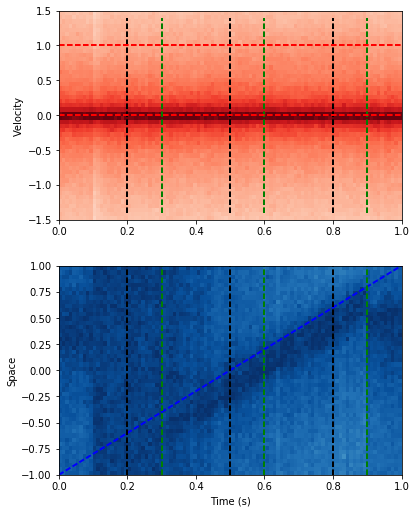

>>> Stimulus  dot MBP  at contrast=  0.313166109656


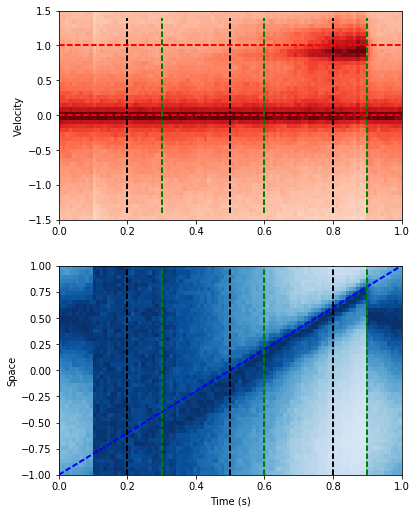

>>> Stimulus  dot MBP  at contrast=  0.402622582987


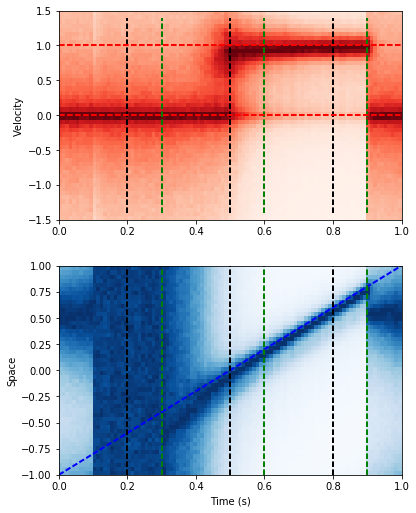

>>> Stimulus  dot MBP  at contrast=  0.517632461921


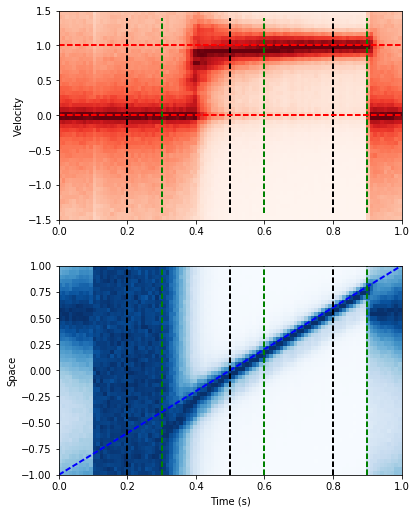

>>> Stimulus  dot MBP  at contrast=  0.665495123612


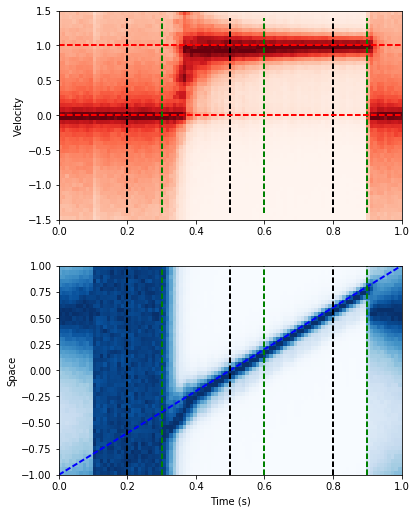

>>> Stimulus  dot MBP  at contrast=  0.855595025683


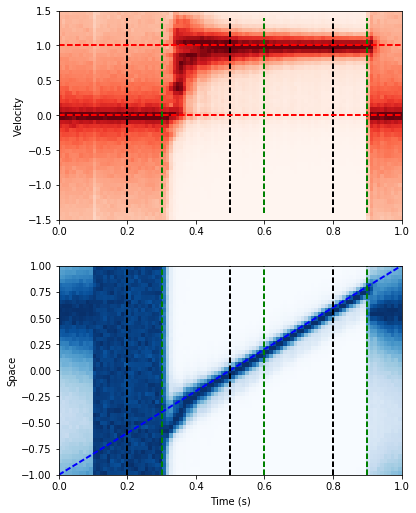

>>> Stimulus  dot MBP  at contrast=  1.09999731328


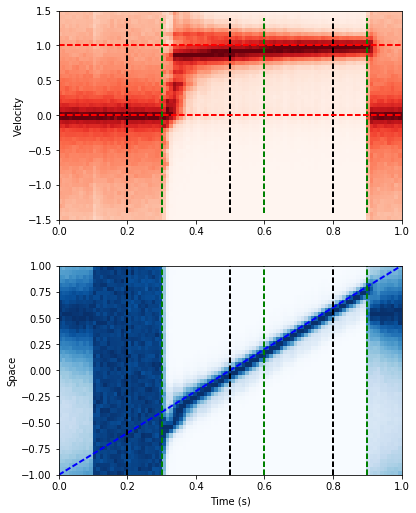

Studying CONDENSATION by changing image along variable(s) : {'im_contrast': array([ 0.2436,  0.3132,  0.4026,  0.5176,  0.6655,  0.8556,  1.1   ])}
>>> Stimulus  flash MBP  at contrast=  0.2435854728


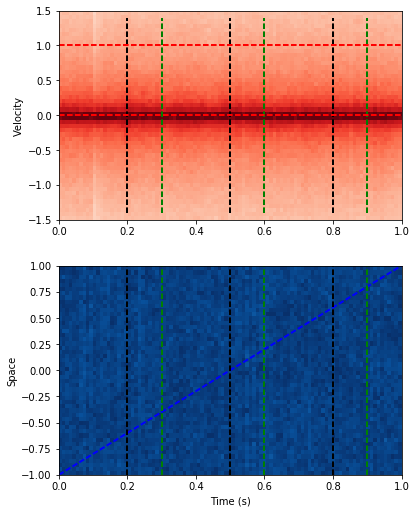

>>> Stimulus  flash MBP  at contrast=  0.313166109656


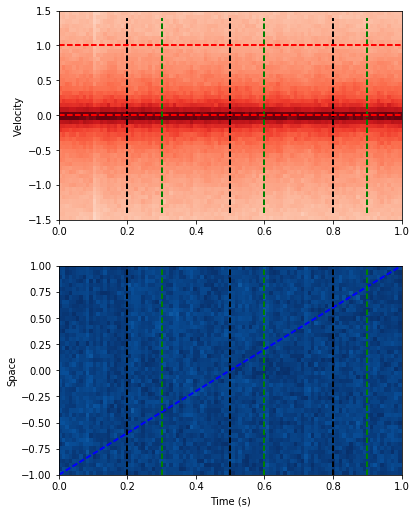

>>> Stimulus  flash MBP  at contrast=  0.402622582987


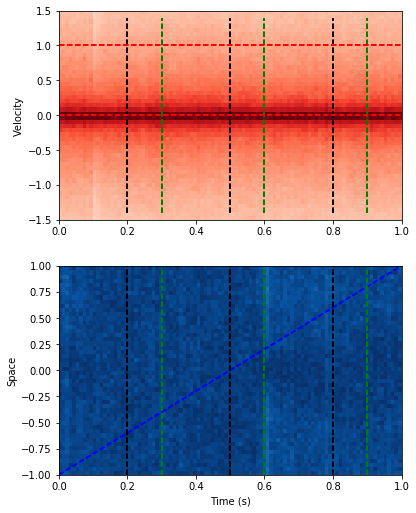

>>> Stimulus  flash MBP  at contrast=  0.517632461921


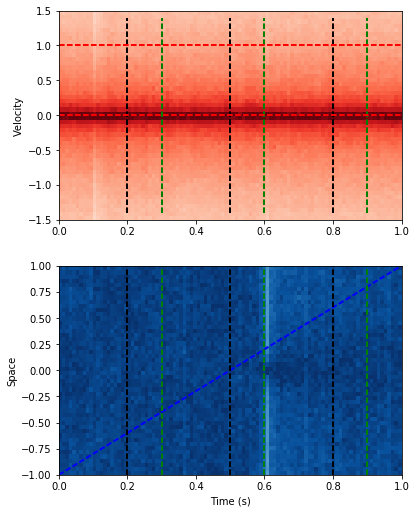

>>> Stimulus  flash MBP  at contrast=  0.665495123612


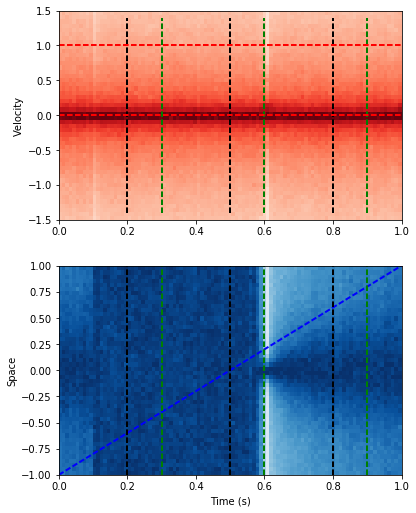

>>> Stimulus  flash MBP  at contrast=  0.855595025683


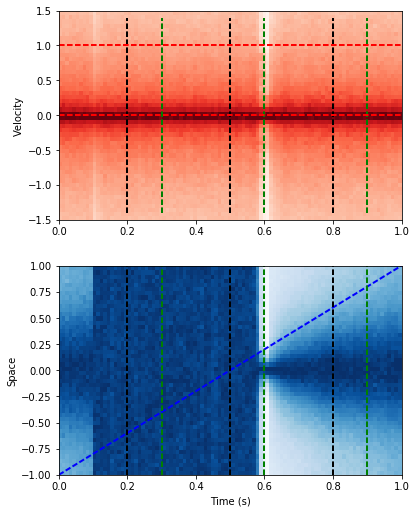

>>> Stimulus  flash MBP  at contrast=  1.09999731328


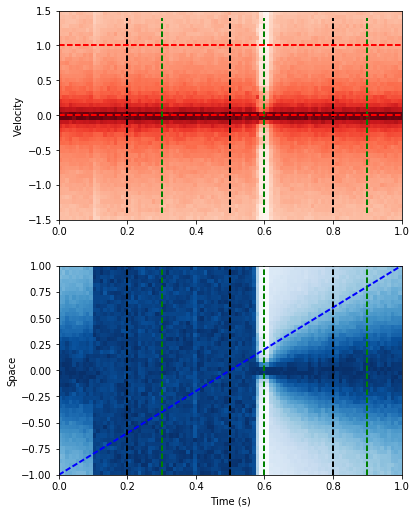

Studying CONDENSATION by changing image along variable(s) : {'flash_start': array([ 0.485,  0.475,  0.46 ,  0.435,  0.375]), 'flash_duration': array([ 0.03,  0.05,  0.08,  0.13,  0.25])}
data_cache/duration-flash-MBP-flash_duration_0_1300-flash_start_0_4350.npy  is locked
data_cache/duration-flash-MBP-flash_duration_0_2500-flash_start_0_3750.npy  is locked
no result yet for  data_cache/duration-flash-MBP-flash_duration_0_2500-flash_start_0_3750.npy


In [ ]:
%run experiment_contrast.py

the range of contrasts is accessible as

In [ ]:
image_contrast[stimulus_tag]['result']['MBP'].keys()

dict_keys([0.24358547280042675, 0.31316610965603203, 0.40262258298731357, 0.51763246192068879, 0.66549512361187169, 0.85559502568260215, 1.0999973132782157])

Let's compute the spatial histograms for each contrast in one dictionary:

In [ ]:
v_hist = {}
for i, stimulus_tag in enumerate(stim_labels):
    v_hist[stimulus_tag] = {}
    for i_contrast, im_contrast in enumerate(im_contrasts):
        particles = image_contrast[stimulus_tag]['result']['MBP'][im_contrast].copy()
        v_hist[stimulus_tag][im_contrast], x_edges, y_edges = mp.spatial_readout(particles, N_quant_X=N_quant_X, N_quant_Y=1, display=False)
        v_hist[stimulus_tag][im_contrast] /= np.sum(v_hist[stimulus_tag][im_contrast], axis=0) # average for each frame
x_middle = .5*(x_edges[1:] + x_edges[:-1])
#y_middle = .5*(y_edges[1:] + y_edges[:-1])

In [ ]:
time = np.linspace(0, 1, N_frame, endpoint=False) + 1/2/N_frame

## methods: fitting a von Mises model

In general, we will want to determine how well a position on the torus is detected. Marginalizing on one axis, this amount to detecting an "angle" (the periodic horizaontal position; between -1 and 1) and variations of this predictions are well captured by a [von Mises distribution](https://en.wikipedia.org/wiki/Von_Mises_distribution):

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:12: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


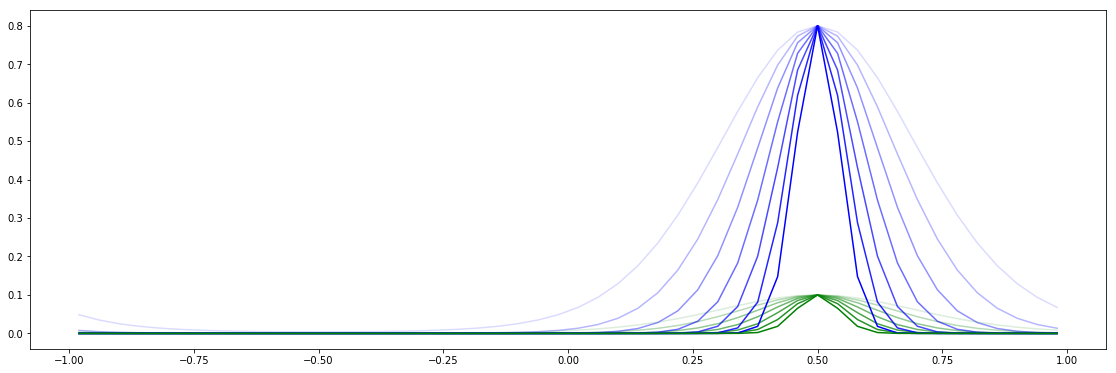

In [ ]:
x = np.linspace(-1, 1, N_quant_X, endpoint=False) + 1/N_quant_X
    
def model(x, A, x_0, B_x):
    #f =  1./A + 1/B_x*np.exp( (np.cos(np.pi*(x-x_0))-1) / B_x**2 )
    f =  A*np.exp( (np.cos(np.pi*(x-x_0))-1) / B_x**2 )
    #f /= f.sum()
    return f

ratio = 1
fig, ax = plt.subplots(1, 1, figsize=(3*fig_width/ratio, fig_width/ratio))
ax.axis(c='b', lw=2, axisbg='w')
ax.set_axis_bgcolor('w')
    
for i_contrast, im_contrast in enumerate(im_contrasts):
    
    ax.plot(x_middle, model(x_middle, A = .8, x_0=.5, B_x=.15/im_contrast), c='b', alpha=(i_contrast+1)/len(im_contrasts), label='C=%.2f' % (im_contrast))
    ax.plot(x_middle, model(x_middle, A = .1, x_0=.5, B_x=.15/im_contrast), c='g', alpha=(i_contrast+1)/len(im_contrasts), label='C=%.2f' % (im_contrast))


### Fitting

We use a Levenberg-Marcquardt method to fir the data with this distribution, as is easily implemented in the [lmfit](http://lmfit.github.io/lmfit-py/) package:

[[Variables]]
    A:     0.53998910 (init= 0.5)
    x_0:  -1.8831e-06 (init= 0.05)
    B_x:   0.19999925 (init= 0.15)
[[Correlations]] (unreported correlations are <  0.100)


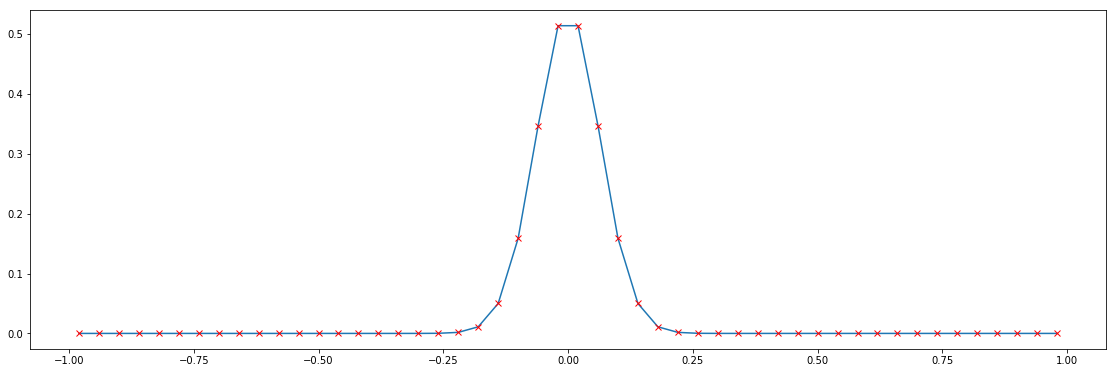

In [ ]:
import lmfit
from lmfit import Model
vonM_mod = Model(model)
vonM_mod.set_param_hint('A', value=.5, min=0.0, max=1.)
vonM_mod.set_param_hint('x_0', value=0.05, min=-1.0, max=1.)
vonM_mod.set_param_hint('B_x', value=.15, min=0.001, max=1)

proba = model(x_middle, A=.54, x_0=0., B_x=.2)
mi = vonM_mod.fit(proba, x=x_middle, method='Nelder')
#mi = lmfit.minimize(residual, p, args=(x, proba,), method='Nelder')
lmfit.printfuncs.report_fit(mi.params)#, min_correl=0.5)

fig, ax = plt.subplots(1, 1, figsize=(3*fig_width/ratio, fig_width/ratio))
ax.plot(x_middle, mi.best_fit)
ax.plot(x_middle, proba, 'rx');

[[Variables]]
    A:     0.74941646 (init= 0.5)
    x_0:   0.99999996 (init= 0.05)
    B_x:   1          (init= 0.15)
[[Correlations]] (unreported correlations are <  0.100)


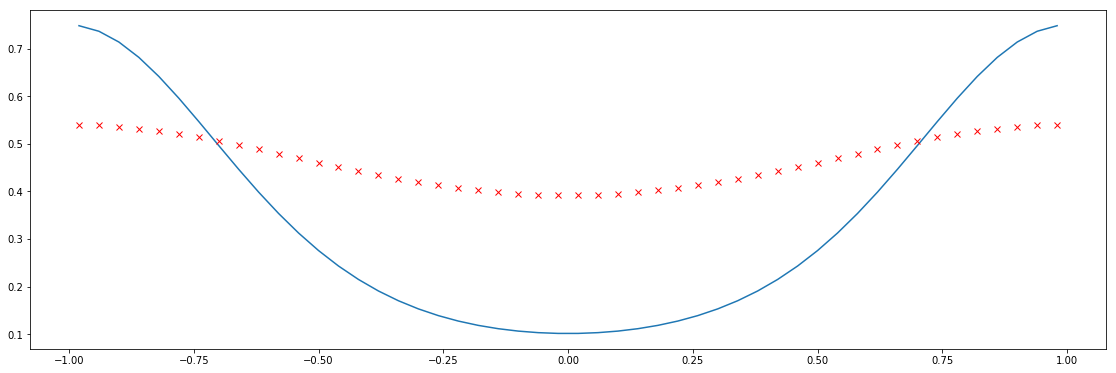

In [ ]:
proba = model(x_middle, A=.54, x_0=-1., B_x=2.5)
mi = vonM_mod.fit(proba, x=x_middle, method='Nelder')
lmfit.printfuncs.report_fit(mi.params)#, min_correl=0.5)


fig, ax = plt.subplots(1, 1, figsize=(3*fig_width/ratio, fig_width/ratio))
ax.plot(x_middle, mi.best_fit)
ax.plot(x_middle, proba, 'rx')




## contrast on flash

### plotting the average error 

First the bias:

Flash occurs at frame  63
Flash occurs at frame  71
Flash occurs at frame  60
Flash occurs at frame  60
Flash occurs at frame  60
Flash occurs at frame  60
Flash occurs at frame  60


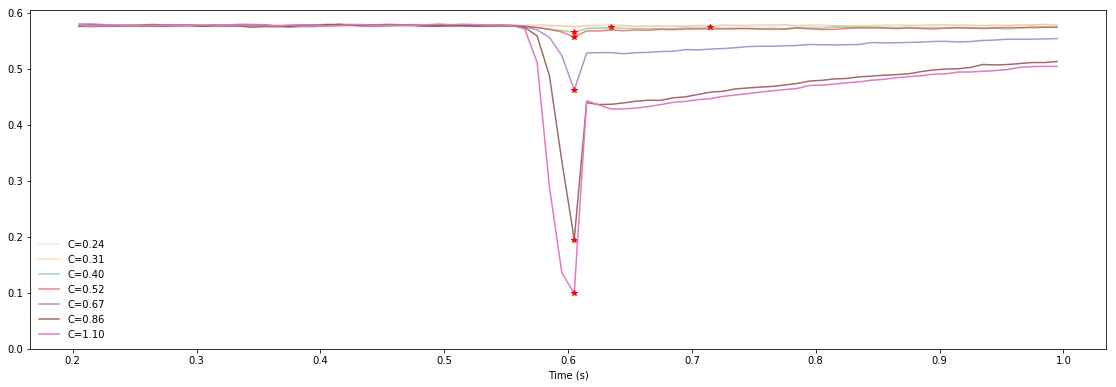

In [ ]:
fig = plt.figure(figsize=(3*fig_width, fig_width ))
a = fig.add_subplot(1, 1, 1)
stimulus_tag = 'flash'
for i_contrast, im_contrast in enumerate(im_contrasts):
    average_std = np.sqrt(np.sum(v_hist[stimulus_tag][im_contrast]*(x_middle[:, np.newaxis])**2, axis=0))
    #prcint(average_std)
    ind_min = np.argmin(average_std)
    print('Flash occurs at frame ', ind_min)
    
    a.plot(time[20:], average_std[20:], alpha=(i_contrast+1)/len(im_contrasts), label='C=%.2f' % (im_contrast))
    _ = a.plot(time[ind_min], [average_std[ind_min]], 'r*')
a.set_ylim(0.)
a.set_xlabel('Time (s)')
legend = a.legend(fontsize='medium', frameon=False, loc='best')
frame = legend.get_frame()
frame.set_facecolor('w')


then the variance:

Flash occurs at frame  63
Flash occurs at frame  71
Flash occurs at frame  60
Flash occurs at frame  60
Flash occurs at frame  60
Flash occurs at frame  60
Flash occurs at frame  60


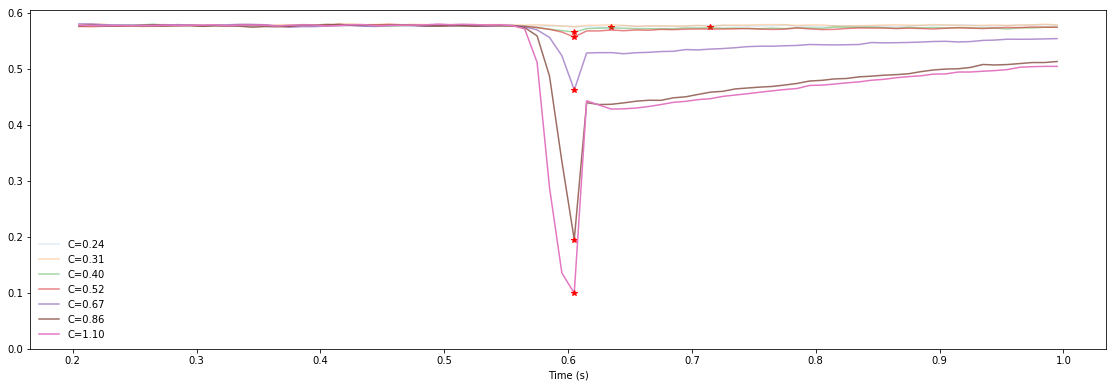

In [ ]:
fig = plt.figure(figsize=(3*fig_width, fig_width ))
a = fig.add_subplot(1, 1, 1)
stimulus_tag = 'flash'
for i_contrast, im_contrast in enumerate(im_contrasts):
    average_pos = np.sum(v_hist[stimulus_tag][im_contrast]*x_middle[:, np.newaxis], axis=0)
    average_std = np.sqrt(np.sum(v_hist[stimulus_tag][im_contrast]*(x_middle[:, np.newaxis]-average_pos[np.newaxis, :])**2, axis=0))
    #prcint(average_std)
    ind_min = np.argmin(average_std)
    print('Flash occurs at frame ', ind_min)
    
    a.plot(time[20:], average_std[20:], alpha=(i_contrast+1)/len(im_contrasts), label='C=%.2f' % (im_contrast))
    _ = a.plot(time[ind_min], [average_std[ind_min]], 'r*')
a.set_ylim(0.)
a.set_xlabel('Time (s)')
legend = a.legend(fontsize='medium', frameon=False, loc='best')
frame = legend.get_frame()
frame.set_facecolor('w')


Both show the same trend: it plateaues at a maximal value, then quickly drops whenever the flash appears (at $t = 0.5 s + \tau $, where $\tau = 0.1 s$ is the delay).

### plotting the average precision

Flash occurs at frame  72
Flash occurs at frame  9
Flash occurs at frame  60
Flash occurs at frame  60
Flash occurs at frame  60
Flash occurs at frame  60
Flash occurs at frame  60


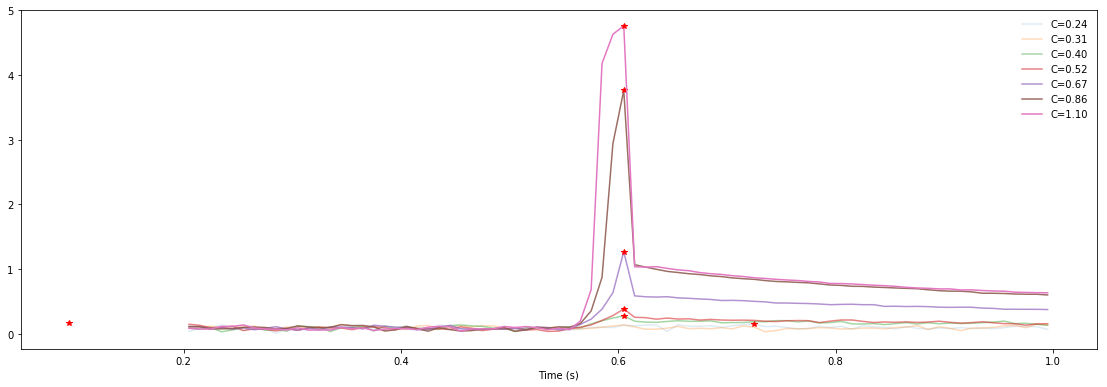

In [ ]:
fig = plt.figure(figsize=(3*fig_width, fig_width ))
a = fig.add_subplot(1, 1, 1)
stimulus_tag = 'flash'
for i_contrast, im_contrast in enumerate(im_contrasts):
    B_x = np.zeros(N_frame)
    for t in range(N_frame):
        proba = v_hist[stimulus_tag][im_contrast][:, t]
        #print(t, proba)
        vonM_mod = Model(model)
        vonM_mod.set_param_hint('A',  value=50, min=0.0)
        vonM_mod.set_param_hint('x_0',  value=x_middle[np.argmax(proba, axis=0)], min=-1.0, max=1.0)
        vonM_mod.set_param_hint('B_x',  value=5.5, min=0.)
        mi = vonM_mod.fit(proba, x=x_middle)#, method='leastsq')

        B_x[t] = mi.params['B_x'].value 
        
    ind_min = np.argmin(B_x)
    print('Flash occurs at frame ', ind_min)
    
    a.plot(time[20:], 1/B_x[20:], alpha=(i_contrast+1)/len(im_contrasts), label='C=%.2f' % (im_contrast))
    _ = a.plot(time[ind_min], [1/B_x[ind_min]], 'r*')
a.set_xlabel('Time (s)')
legend = a.legend(fontsize='medium', frameon=False, loc='best')
frame = legend.get_frame()
frame.set_facecolor('w')


In [ ]:
mi, mi.params['B_x']

(<lmfit.model.ModelResult at 0x131c1af98>,
 <Parameter 'B_x', value=1.5835689490134102 +/- 0.0151, bounds=[0.0:inf]>)

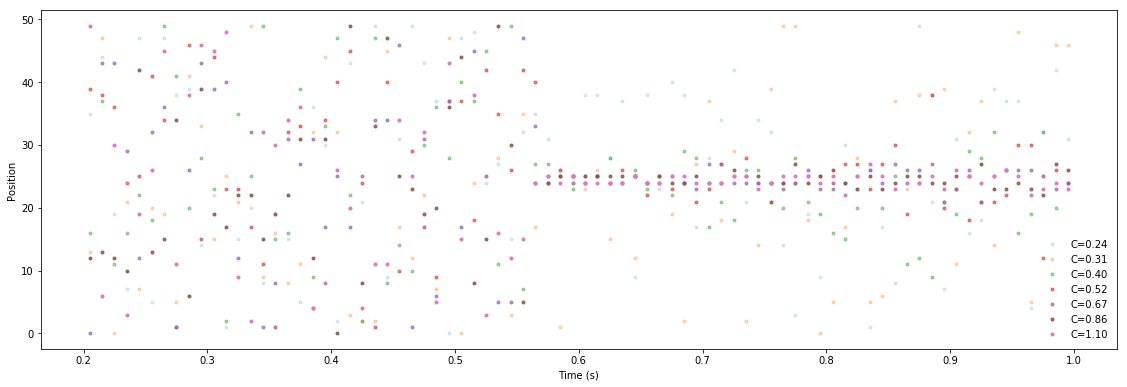

In [ ]:
fig = plt.figure(figsize=(3*fig_width, fig_width ))
a = fig.add_subplot(1, 1, 1)
stimulus_tag = 'flash'
for i_contrast, im_contrast in enumerate(im_contrasts):
    p = v_hist[stimulus_tag][im_contrast]
    p /= p.sum(axis=0)[np.newaxis, :]
    ind_min = np.argmax(p, axis=0)
    a.plot(time[20:], ind_min[20:], '.', alpha=(i_contrast+1)/len(im_contrasts), label='C=%.2f' % (im_contrast))
a.set_xlabel('Time (s)')
a.set_ylabel('Position')
legend = a.legend(fontsize='medium', frameon=False, loc='best')
frame = legend.get_frame()
frame.set_facecolor('w')
    

Contrast =  0.2435854728  Flash occurs at frame  44
Contrast =  0.313166109656  Flash occurs at frame  10
Contrast =  0.402622582987  Flash occurs at frame  43
Contrast =  0.517632461921  Flash occurs at frame  3
Contrast =  0.665495123612  Flash occurs at frame  2
Contrast =  0.855595025683  Flash occurs at frame  48
Contrast =  1.09999731328  Flash occurs at frame  49


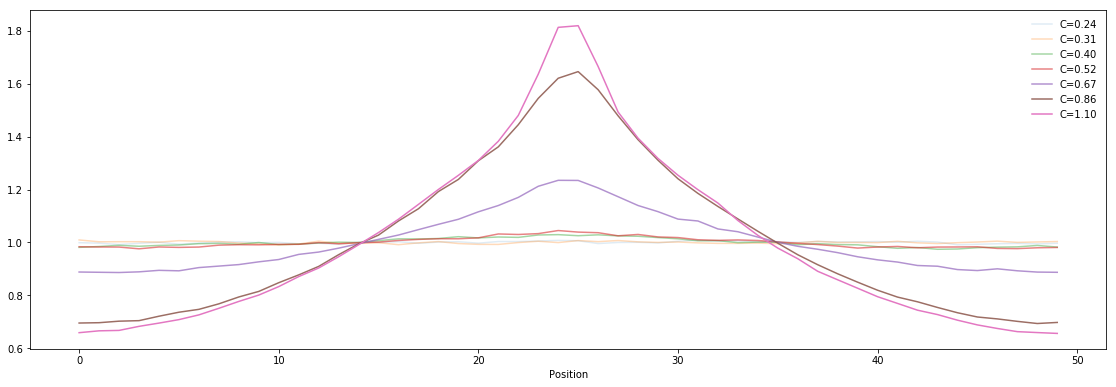

In [ ]:
fig = plt.figure(figsize=(3*fig_width, fig_width ))
a = fig.add_subplot(1, 1, 1)
stimulus_tag = 'flash'
#time /= time.sum()
for i_contrast, im_contrast in enumerate(im_contrasts):
    average_time = np.sum(v_hist[stimulus_tag][im_contrast]*time[np.newaxis, :], axis=1)
    ind_min = np.argmin(average_time)
    print('Contrast = ', im_contrast, ' Flash occurs at frame ', ind_min)
    a.plot(average_time, alpha=(i_contrast+1)/len(im_contrasts), label='C=%.2f' % (im_contrast))
    #_ = a.plot([ind_min], [average_time[ind_min]], 'r*')
a.set_xlabel('Position')
legend = a.legend(fontsize='medium', frameon=False, loc='best')
frame = legend.get_frame()
frame.set_facecolor('w')
    

From now on, we will only measure the total variance:

In [ ]:
do_var = False

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:43: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


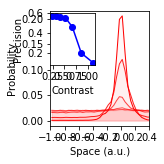

In [ ]:
time_ind_max_flash = 60
stimulus_tag = 'flash'

fig, ax = plt.subplots(1, 1, figsize=(fig_width/2.618, fig_width/2.618))
ax.axis(c='b', lw=2, axisbg='w')
ax.set_axis_bgcolor('w')
frames = 1
for i_contrast, im_contrast in enumerate(im_contrasts):
    particles = image_contrast[stimulus_tag]['result']['MBP'][im_contrast]
    for i, i_frame in  enumerate(range(time_ind_max_flash-frames, time_ind_max_flash+frames-1)):
        if 1:
            v_hist_, x_edges, y_edges = mp.spatial_readout(particles[:, :, i_frame], 
                                                            N_quant_X=N_quant_X, N_quant_Y=1, display=False)
            proba = v_hist_
        else:
            v_hist_, x_edges, y_edges = mp.spatial_readout(particles[:, :, i_frame], 
                                                            N_quant_X=N_quant_X, N_quant_Y=N_quant_Y, display=False)
            proba = v_hist_[:, (N_quant_Y/2-4):(N_quant_Y/2+4)].sum(axis=1)

        x_middle = .5*(x_edges[1:] + x_edges[:-1])
        proba /= proba.sum()
        proba = proba.ravel()
        if i_contrast %2 :
            ax.plot(x_middle, proba, c='r', lw=1., alpha=(i_contrast+1)/len(im_contrasts), label='C=%.1f' % (im_contrast))
        else:
            ax.plot(x_middle, proba, c='r', lw=1., alpha=(i_contrast+1)/len(im_contrasts))
        ax.fill_between(x_middle, proba, proba*0, color='r', alpha=.031)


ax.set_xlim([-1., .4])
ax.set_xlabel('Space (a.u.)')
ax.set_ylabel('Probability')
if 0:
    legend = ax.legend(fontsize='medium', frameon=False)
    frame = legend.get_frame()
    frame.set_facecolor('w')
#ax.set_ylim((0., 0.06))
plt.locator_params(axis = 'x', nbins = 8)
plt.locator_params(axis = 'y', nbins = 5)

inset = fig.add_axes([.315, .6, .26, .3])
inset.axis(c='b', lw=2, axisbg='w')
inset.set_axis_bgcolor('w')
average_std = []
for i_contrast, im_contrast in enumerate(im_contrasts):
    average_pos = np.sum(v_hist[stimulus_tag][im_contrast]*x_middle[:, np.newaxis], axis=0)
    average_std.append(np.sqrt(np.sum(v_hist[stimulus_tag][im_contrast]*(x_middle[:, np.newaxis]-average_pos[np.newaxis, :])**2, axis=0)))

average_std = np.array(average_std)
inset.plot(im_contrasts, average_std[:, time_ind_max_flash], 'o-', c='b')
inset.set_xlabel('Contrast')
inset.set_ylabel('Precision')
#inset.set_ylim((0., 0.6))
plt.locator_params(axis = 'x', nbins = 4)
plt.locator_params(axis = 'y', nbins = 4)

plt.tight_layout()
#for ext in FORMATS: fig.savefig(os.path.join('/tmp/', 'FLE_contrast-A' + ext))

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


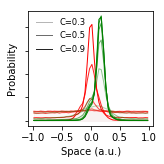

In [ ]:
time_ind_max_flash = 60

fig, ax = plt.subplots(1, 1, figsize=(fig_width/2.618, fig_width/2.618))
ax.axis(c='b', lw=2, axisbg='w')
ax.set_axis_bgcolor('w')
frames = 1

for stimulus_tag, t_lag, color in zip(['flash', 'dot'], [0, 0], ['r', 'g']):
    for i_contrast, im_contrast in enumerate(im_contrasts):
        particles = image_contrast[stimulus_tag]['result']['MBP'][im_contrast]
        for i, i_frame in  enumerate(range(time_ind_max_flash-frames, time_ind_max_flash+frames-1)):
            if 1:
                v_hist_, x_edges, y_edges = mp.spatial_readout(particles[:, :, i_frame], 
                                                                N_quant_X=N_quant_X, N_quant_Y=1, display=False)
                proba = v_hist_
            else:
                v_hist_, x_edges, y_edges = mp.spatial_readout(particles[:, :, i_frame], 
                                                                N_quant_X=N_quant_X, N_quant_Y=N_quant_Y, display=False)
                proba = v_hist_[:, (N_quant_Y/2-4):(N_quant_Y/2+4)].sum(axis=1)

            x_middle = .5*(x_edges[1:] + x_edges[:-1])
            proba /= proba.sum()
            proba = proba.ravel()
            ax.plot(x_middle, proba, c=color, lw=1., alpha=(i_contrast+1)/len(im_contrasts))
            if i_contrast %2 and stimulus_tag=='flash' :
                ax.plot([], [], c='k', lw=1., alpha=(i_contrast+1)/len(im_contrasts), label='C=%.1f' % (im_contrast))
            ax.fill_between(x_middle, proba, proba*0, color=color, alpha=.005)


#ax.set_xlim([-1., .4])
ax.set_xlabel('Space (a.u.)')
ax.set_ylabel('Probability')
if 1:
    legend = ax.legend(fontsize='small', frameon=False, loc='upper left')
    frame = legend.get_frame()
    frame.set_facecolor('w')
#ax.set_ylim((0., 0.06))
plt.locator_params(axis = 'x', nbins = 8)
#plt.locator_params(axis = 'y', nbins = 0)
#ax.set_yticks=[]
#ax.set_yticklabels=[]
ax.yaxis.set_ticklabels([])
if 0:
    inset = fig.add_axes([.315, .6, .26, .3])
    inset.axis(c='b', lw=2, axisbg='w')
    inset.set_axis_bgcolor('w')
    average_std = []
    for i_contrast, im_contrast in enumerate(im_contrasts):
        average_pos = np.sum(v_hist[stimulus_tag][im_contrast]*x_middle[:, np.newaxis], axis=0)
        average_std.append(np.sqrt(np.sum(v_hist[stimulus_tag][im_contrast]*(x_middle[:, np.newaxis]-average_pos[np.newaxis, :])**2, axis=0)))

    average_std = np.array(average_std)
    inset.plot(im_contrasts, average_std[:, time_ind_max_flash], 'o-', c='b')
    inset.set_xlabel('Contrast')
    inset.set_ylabel('Precision')
    #inset.set_ylim((0., 0.6))
    plt.locator_params(axis = 'x', nbins = 4)
    plt.locator_params(axis = 'y', nbins = 4)

plt.tight_layout()

## panel dot

Max occurs at frame  63
Max occurs at frame  88
Max occurs at frame  85
Max occurs at frame  88
Max occurs at frame  81
Max occurs at frame  66
Max occurs at frame  87


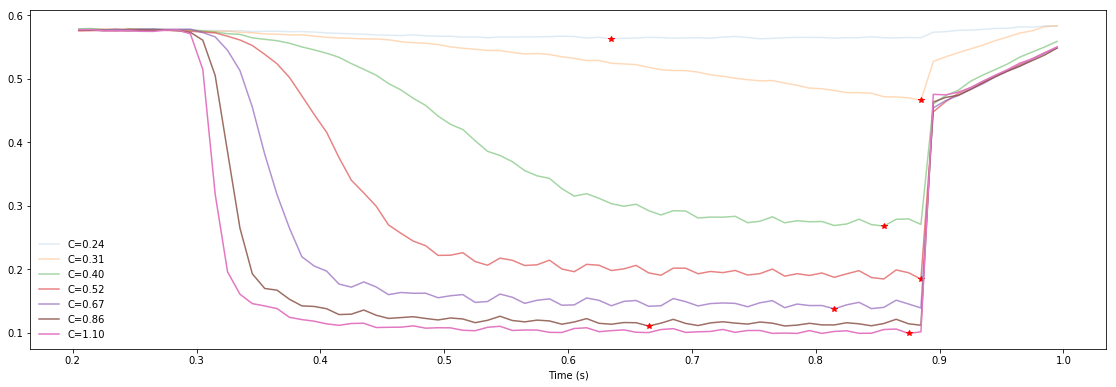

In [ ]:
fig = plt.figure(figsize=(3*fig_width, fig_width ))
a = fig.add_subplot(1, 1, 1)
stimulus_tag = 'dot' 
for i_contrast, im_contrast in enumerate(im_contrasts):
    if do_var:
        average_pos = np.sum(v_hist[stimulus_tag][im_contrast]*x_middle[:, np.newaxis], axis=0)
    else:
        average_pos = np.linspace(-1, 1, N_frame)
    average_std = np.sqrt(np.sum(v_hist[stimulus_tag][im_contrast]*(mp.torus(x_middle[:, np.newaxis]-average_pos[np.newaxis, :], w=2))**2, axis=0))
    #prcint(average_std)
    ind_min = np.argmin(average_std)
    print('Max occurs at frame ', ind_min)
    
    a.plot(time[20:], average_std[20:], alpha=(i_contrast+1)/len(im_contrasts), label='C=%.2f' % (im_contrast))
    _ = a.plot(time[ind_min], [average_std[ind_min]], 'r*')
a.set_xlabel('Time (s)')
legend = a.legend(fontsize='medium', frameon=False, loc='best')
frame = legend.get_frame()
frame.set_facecolor('w')


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


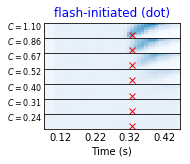

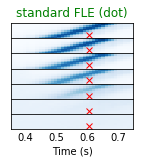

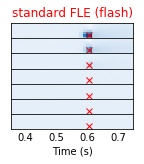

In [ ]:
def plot_panels_A(stimulus_tag, N_downscale=1, DX=5, DT=20, time_ind_max_flash=60, title=None, x_offset=3, t_offset=-5, labels=True, ms=6, color='k'):
    N_contrast = len(im_contrasts)//N_downscale
    vmax = 0
    for i_ax, im_contrast in enumerate(im_contrasts[::N_downscale]):
        vmax = np.max((vmax, v_hist[stimulus_tag][im_contrast].max()))
    t = time_ind_max_flash/N_frame
    x_center = int(N_quant_X*(time_ind_max_flash-latency)/N_frame) + x_offset
    x_start, x_stop = x_center - DX, x_center + DX
    t_center = time_ind_max_flash + t_offset
    t_start, t_stop = t_center - DT,  t_center + DT
    border = 1 + .1 * (labels==True)
    fig, axs = plt.subplots(N_contrast, 1, figsize=(border * fig_width/2.618, fig_width/2.618))
    for i_ax, im_contrast in enumerate(im_contrasts[::N_downscale]):
        #Time, X = np.meshgrid(np.linspace(0, 1, N_frame, endpoint=True), x_edges[1:])
        Time, X = np.meshgrid(np.linspace(0, 1, N_frame, endpoint=True)[t_start:t_stop], x_edges[x_start:x_stop])
        ax = axs[N_contrast-i_ax-1]
        ax.pcolormesh(Time, X, #[x_start:x_stop, t_start:t_stop], X[x_start:x_stop, t_start:t_stop], 
                      v_hist[stimulus_tag][im_contrast][x_start:x_stop, t_start:t_stop], 
                         cmap=plt.cm.Blues, vmin=0., vmax=vmax)#, edgecolor=(.1, .1, .1, .6))
        # labels
        if labels: ax.text(Time[0, 0]-.105, X[DX, 0], r'$C=%.2f$' % (im_contrast), color='black', fontsize=8)
        if i_ax==0: ax.set_xlabel('Time (s)')
        # plotting as a red cross the delayed position knowing the speed
        if False: #stimulus_tag=='dot': 
            ax.plot(t + .5/N_frame, X[DX-x_offset, 0]+2*latency/N_frame, 'rx', ms=ms)
        else: 
            ax.plot(t + .5/N_frame, X[DX-x_offset, 0], 'rx', ms=ms)
        # plotting as a red plus sign the physical position
        #ax.plot(t-latency/N_frame, X[DX-x_offset, 0], 'r+', ms=ms)
        #ax.plot([.2, .9], [-.6, -.6], 'r--', lw=2)
        #ax.plot([.2, .9], [.6, .6], 'r--', lw=2)
        # cleaning-up
        ax.set_xlim([Time[0, 0], Time[0, -1]])
        ax.set_ylim([X[0, 0], X[-1, 0]])
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.spines['top'].set_color('none')
        #ax.spines['bottom'].set_color('none')
        #ax.spines['left'].set_smart_bounds(True)
        #ax.spines['bottom'].set_smart_bounds(True)
        #ax.xaxis.set_ticks_position('bottom')
        #ax.yaxis.set_ticks_position('left')

        #ax.axis([t_start, t_stop, x_start, x_stop])
        
    if title is None: title=stimulus_tag
    axs[-1].set_xticks( [t-.2, t-.1, t, t+.1])#np.linspace(Time[0, t_start], Time[0, t_stop-1], 4, endpoint=True))
    axs[-1].xaxis.set_tick_params(length=0)#{'bottom':'off', 'top':'off'})
    axs[0].set_title(title, color=color)
    plt.tight_layout()
    fig.subplots_adjust(hspace = .0, wspace = .0, left=0.2)#, bottom=0., right=1., top=.9)
    return fig, axs

#fig, axs = plot_panels_A('flash', x_offset=0)
#for ext in FORMATS: fig.savefig(os.path.join('/tmp/', 'FLE_contrast-A1' + ext))

for i, (time_ind_max_flash, stimulus_tag, c, label) in enumerate(zip([32, 60, 60], ['dot', 'dot', 'flash'], ['b', 'g', 'r'], ['flash-initiated (dot)', 'standard FLE (dot)', 'standard FLE (flash)'] )):
    fig, axs = plot_panels_A(stimulus_tag, labels=(i==0), time_ind_max_flash=time_ind_max_flash, title=label, color=c)
    fig.show()
    for ext in FORMATS: fig.savefig(os.path.join('../figures/', 'FLE_contrast-A' + str(i+1) + ext))

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:7: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


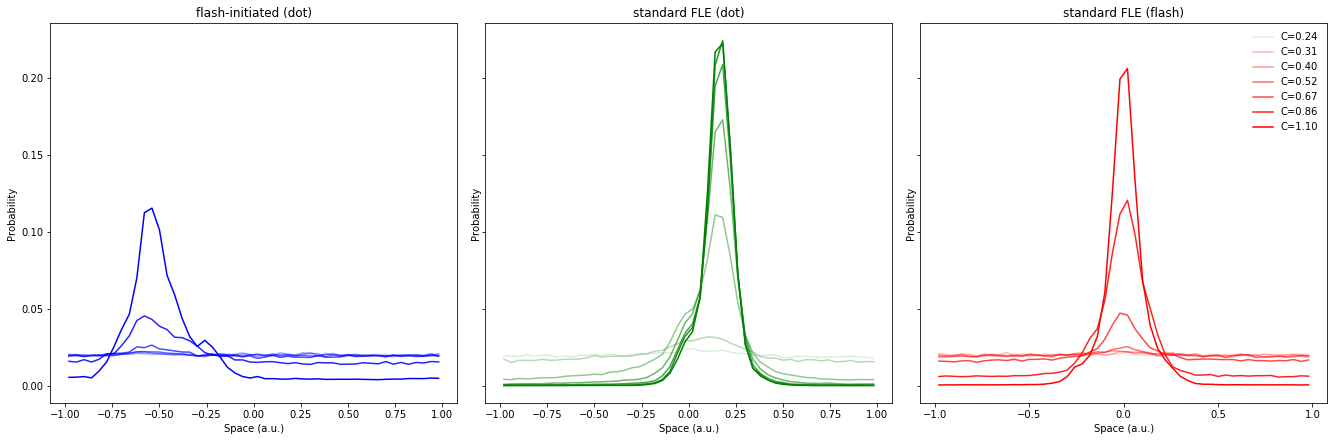

In [ ]:
ratio = 1 # 2.618
fig, axs = plt.subplots(1, 3, figsize=(3*fig_width/ratio, fig_width/ratio), sharey=True)
frames = 1
for i, (time_ind_max_flash, stimulus_tag, c, label) in enumerate(zip([32, 60, 60], ['dot', 'dot', 'flash'], ['b', 'g', 'r'], ['flash-initiated (dot)', 'standard FLE (dot)', 'standard FLE (flash)'] )):
    ax = axs[i]
    ax.axis(c='b', lw=2, axisbg='w')
    ax.set_axis_bgcolor('w')
    for i_contrast, im_contrast in enumerate(im_contrasts):
        particles = image_contrast[stimulus_tag]['result']['MBP'][im_contrast]
        for i, i_frame in  enumerate(range(time_ind_max_flash-frames, time_ind_max_flash+frames-1)):
            if 1:
                v_hist_, x_edges, y_edges = mp.spatial_readout(particles[:, :, i_frame], 
                                                                N_quant_X=N_quant_X, N_quant_Y=1, display=False)
                proba = v_hist_
            else:
                v_hist_, x_edges, y_edges = mp.spatial_readout(particles[:, :, i_frame], 
                                                                N_quant_X=N_quant_X, N_quant_Y=N_quant_Y, display=False)
                proba = v_hist_[:, (N_quant_Y/2-4):(N_quant_Y/2+4)].sum(axis=1)

            x_middle = .5*(x_edges[1:] + x_edges[:-1])
            proba /= proba.sum()
            ax.plot(x_middle, proba, c=c, alpha=(i_contrast+1)/len(im_contrasts), label='C=%.2f' % (im_contrast))

    ax.set_title(label)
    ax.set_xlabel('Space (a.u.)')
    ax.set_ylabel('Probability')
if True:
    legend = ax.legend(fontsize='medium', frameon=False)
    frame = legend.get_frame()
    frame.set_facecolor('w')
#ax.set_ylim((0., 0.06))
plt.locator_params(axis = 'x', nbins = 8)
plt.locator_params(axis = 'y', nbins = 5)
plt.tight_layout()


/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:19: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


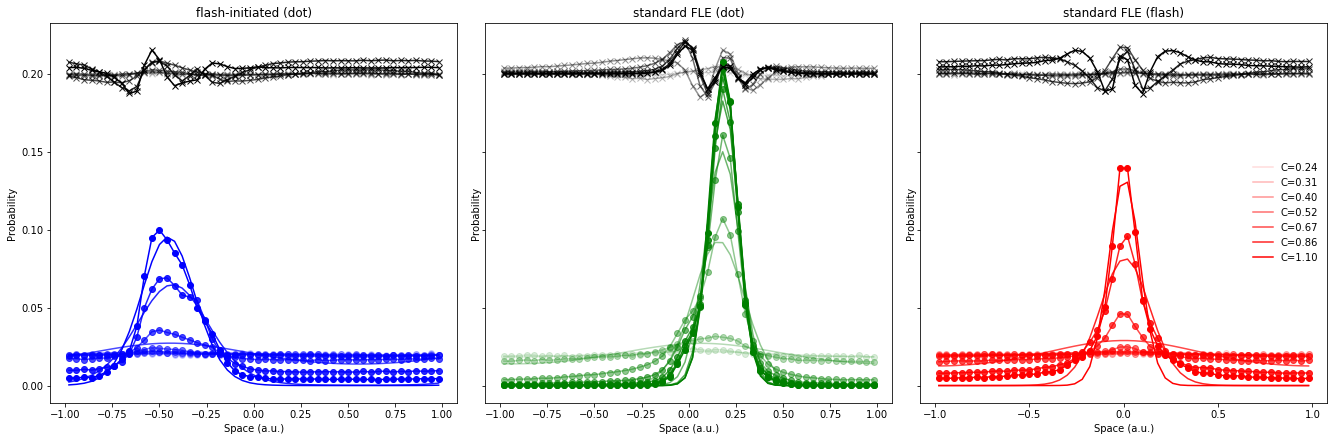

In [ ]:

#time_ind_max_flash = 35
#ax.plot(im_contrasts, average_std[:, time_ind_max_flash]**-2, 'o--', c='g')#, label='early')
#time_ind_max_flash = 60
#ax.plot(im_contrasts, average_std[:, time_ind_max_flash]**-2, 'o-', c='g')#, label='midpoint')

ratio = 1 # 2.618
fig, axs = plt.subplots(1, 3, figsize=(3*fig_width/ratio, fig_width/ratio), sharey=True)
frames = 2

N_contrast = len(im_contrasts)
HWHHs = np.zeros((3, N_contrast))
peaks = np.zeros((3, N_contrast))
x_0s = np.zeros((3, N_contrast))
B_xs = np.zeros((3, N_contrast))
for i, (time_ind_max_flash, stimulus_tag, c, label) in enumerate(zip([32, 60, 60], ['dot', 'dot', 'flash'], ['b', 'g', 'r'], ['flash-initiated (dot)', 'standard FLE (dot)', 'standard FLE (flash)'] )):
    ax = axs[i]
    ax.axis(c='b', lw=2, axisbg='w')
    ax.set_axis_bgcolor('w')
    for i_contrast, im_contrast in enumerate(im_contrasts):
        #particles = image_contrast[stimulus_tag]['result']['MBP'][im_contrast]
        #v_hist_, x_edges, y_edges = mp.spatial_readout(particles[:, :, time_ind_max_flash], 
        #                                                    N_quant_X=N_quant_X, N_quant_Y=1, display=False)
        #proba = v_hist_
        proba = v_hist[stimulus_tag][im_contrast][:, (time_ind_max_flash-frames):(time_ind_max_flash+frames+1)].mean(axis=-1)

        #x_middle = .5*(x_edges[1:] + x_edges[:-1])
        proba /= proba.sum()

        #p = lmfit.Parameters()
        #lmfit.minimize?
        #p.add_many(('A',  0.5, True,  0.0, None,  None),
        #           ('x_0', 0., True,  -1.,   1.,  None),
        #           ('B_x', 1., True,  0.0, None,  None))
        peaks[i, i_contrast] = x_middle[np.argmax(proba, axis=0)]

        vonM_mod = Model(model)
        vonM_mod.set_param_hint('A',  value=50, min=0.0)
        vonM_mod.set_param_hint('x_0',  value=peaks[i, i_contrast], min=-1.0, max=1.0)
        vonM_mod.set_param_hint('B_x',  value=5.5, min=0.)
        mi = vonM_mod.fit(proba, x=x_middle)#, method='leastsq')
        #mi = lmfit.minimize(residual, p, args=(x, proba,), method='Nelder')
        #lmfit.printfuncs.report_fit(mi.params)#, min_correl=0.5)

        ax.set_title(label)
        ax.plot(x_middle, mi.best_fit, c=c, ls='-', alpha=(i_contrast+1)/len(im_contrasts), label='C=%.2f' % (im_contrast))
        ax.plot(x_middle, proba, c=c, marker='o', alpha=(i_contrast+1)/len(im_contrasts))
        ax.plot(x_middle, .2 + proba-mi.best_fit, c='k', marker='x', alpha=(i_contrast+1)/len(im_contrasts))
        #

        x_0s[i, i_contrast] = mi.params['x_0'].value 
        k = 1/np.pi**2/mi.params['B_x'].value**2        
        HWHHs[i, i_contrast] =  np.arccos(1+ np.log((1+np.exp(-2*k))/2)/k) / np.arccos(0)
        B_xs[i, i_contrast] = mi.params['B_x']
    ax.set_xlabel('Space (a.u.)')
    ax.set_ylabel('Probability')
if True:
    legend = ax.legend(fontsize='medium', frameon=False, loc='right')
    frame = legend.get_frame()
    frame.set_facecolor('w')
#ax.set_ylim((0., 0.06))
plt.locator_params(axis = 'x', nbins = 8)
plt.locator_params(axis = 'y', nbins = 5)
plt.tight_layout()

In [ ]:
vonM_mod = Model(model)
vonM_mod.param_names

['A', 'x_0', 'B_x']

In [ ]:
B_xs, peaks, x_0s

(array([[  9.8539,   7.6962,   5.148 ,   3.5137,   1.7162,   0.586 ,   0.446 ],
        [  3.4106,   1.7309,   0.4259,   0.2867,   0.2459,   0.2328,
           0.2302],
        [  8.8139,  10.752 ,   4.555 ,   3.5973,   1.5488,   0.4139,
           0.2596]]), array([[-0.58, -0.5 , -0.54, -0.54, -0.5 , -0.46, -0.5 ],
        [ 0.02,  0.14,  0.18,  0.18,  0.18,  0.18,  0.18],
        [ 0.02,  0.1 ,  0.02,  0.02, -0.02,  0.02,  0.02]]), array([[-0.1957, -0.3861, -0.3476, -0.462 , -0.445 , -0.4296, -0.4543],
        [ 0.0306,  0.0651,  0.1593,  0.179 ,  0.1839,  0.1849,  0.183 ],
        [ 0.0383, -0.2796,  0.021 , -0.0184,  0.0017,  0.007 ,  0.0034]]))

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


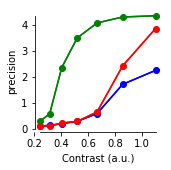

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width/2.618, fig_width/2.618))

for i, (time_ind_max_flash, stimulus_tag, c, label) in enumerate(zip([32, 60, 60], ['dot', 'dot', 'flash'], ['b', 'g', 'r'], ['flash-initiated (dot)', 'standard FLE (dot)', 'standard FLE (flash)'] )):
    ax.plot(im_contrasts, 1/B_xs[i, :], ls='-', c=c, label=label)
    ax.plot(im_contrasts, 1/B_xs[i, :], marker='o', ls='-', c=c)

    
ax.axis(c='b', lw=2)#, axisbg='w')
ax.set_axis_bgcolor('w')

ax.set_xlabel('Contrast (a.u.)')
ax.set_ylabel('precision')
if False:
    legend = ax.legend(fontsize='medium', frameon=False, loc='upper left')#lower right')
    #frame = legend.get_frame()
    #frame.set_facecolor('w')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#ax.yaxis.set_ticklabels([])

ax.axis('tight')
#ax.set_ylim((0., 6.))
#ax.set_xlim((0.2, 1.3))
plt.locator_params(axis = 'x', nbins = 5)
plt.locator_params(axis = 'y', nbins = 5)
plt.tight_layout()
fig.subplots_adjust(left=0.25, bottom=0.26, right=.99, top=.97)

for ext in FORMATS: fig.savefig(os.path.join('../figures/', 'FLE_contrast-B1' + ext))

In [ ]:
average_std.shape

(100,)

In [ ]:
B_xs

array([[  9.8539,   7.6962,   5.148 ,   3.5137,   1.7162,   0.586 ,   0.446 ],
       [  3.4106,   1.7309,   0.4259,   0.2867,   0.2459,   0.2328,
          0.2302],
       [  8.8139,  10.752 ,   4.555 ,   3.5973,   1.5488,   0.4139,
          0.2596]])

-0.27999999999999997 0.6 [    nan  0.1569  0.1562  0.099   0.1275  0.1552  0.1228]
0.0 0 [    nan  0.1026  0.1697  0.1795  0.182   0.1824  0.1815]
0.0 [    nan  0.1026  0.1697  0.1795  0.182   0.1824  0.1815] [    nan  0.0128  0.1902  0.1803  0.1728  0.1959  0.1932]


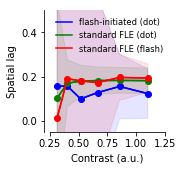

In [ ]:
zoom = 1
fig, ax = plt.subplots(1, 1, figsize=(zoom*fig_width/2.618, zoom*fig_width/2.618))
B_zoom = 4
x_0s[0, 0] = np.NAN
x_0s[1, 0] = np.NAN
for i, (time_ind_max_flash, stimulus_tag, c, label) in enumerate(zip([32, 60, 60], ['dot', 'dot', 'flash'], ['b', 'g', 'r'], ['flash-initiated (dot)', 'standard FLE (dot)', 'standard FLE (flash)'] )):
    if False:# i==2:     
        ax.plot([], [], ls='-', c=c, label=label)
        break
    t_offset = time_ind_max_flash/100 -.6
    if i==0: 
        x_offset = .6
    elif i==2: 
        x_offset = (x_0s[1, :]+peaks[1, :])/2
    else:
        x_offset = 0
    sl = x_offset + peaks[i, :]
    sl = x_offset + x_0s[i, :]
    sl = x_offset + (x_0s[i, :]+peaks[i, :])/2
    print(t_offset, x_offset, sl)
    ax.plot(im_contrasts, sl, marker='o', ls='-', c=c)
    ax.plot(im_contrasts, sl, ls='-', c=c, label=label)
    ax.fill_between(im_contrasts, sl-B_xs[i, :]/B_zoom, sl+B_xs[i, :]/B_zoom, color=c, alpha=.1)

ax.set_xlabel('Contrast (a.u.)')
ax.set_ylabel('Spatial lag')
if True:
    legend = ax.legend(fontsize='small', frameon=False, loc='upper right')
    frame = legend.get_frame()
    frame.set_facecolor('w')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.axis('tight')
plt.locator_params(axis = 'x', nbins = 5)
plt.locator_params(axis = 'y', nbins = 5)
plt.tight_layout()
ax.set_ylim((-0.05, 0.5))
ax.set_xlim((0.2, 1.3))
fig.subplots_adjust(left=0.25, bottom=0.26, right=.99, top=.97)

for ext in FORMATS: fig.savefig(os.path.join('../figures/', 'FLE_contrast-B2' + ext))

## panel spatial lag

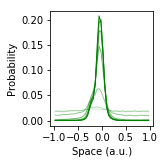

In [ ]:
time_ind_max_flash = 50 #int(50+31/2)
stimulus_tag = 'dot'

fig, ax = plt.subplots(1, 1, figsize=(fig_width/2.618, fig_width/2.618))
ax.axis(c='b', lw=2, axisbg='w')
ax.set_facecolor('w')
frames = 1
for i_contrast, im_contrast in enumerate(im_contrasts):
    particles = image_contrast[stimulus_tag]['result']['MBP'][im_contrast]
    for i, i_frame in  enumerate(range(time_ind_max_flash-frames, time_ind_max_flash+frames-1)):
        if 1:
            v_hist_, x_edges, y_edges = mp.spatial_readout(particles[:, :, i_frame], 
                                                            N_quant_X=N_quant_X, N_quant_Y=1, display=False)
            proba = v_hist_
        else:
            v_hist_, x_edges, y_edges = mp.spatial_readout(particles[:, :, i_frame], 
                                                            N_quant_X=N_quant_X, N_quant_Y=N_quant_Y, display=False)
            proba = v_hist_[:, (N_quant_Y/2-4):(N_quant_Y/2+4)].sum(axis=1)

        x_middle = .5*(x_edges[1:] + x_edges[:-1])
        proba /= proba.sum()
        ax.plot(x_middle, proba, c='g', lw=1., alpha=(i_contrast+1)/len(im_contrasts), label='C=%.2f' % (im_contrast))

ax.set_xlabel('Space (a.u.)')
ax.set_ylabel('Probability')
if 0:
    legend = ax.legend(fontsize='medium', frameon=False, loc='upper left')
    frame = legend.get_frame()
    frame.set_facecolor('w')
#ax.set_ylim((0., 0.06))
plt.locator_params(axis = 'x', nbins = 8)
plt.locator_params(axis = 'y', nbins = 5)
plt.tight_layout()
#for ext in FORMATS: fig.savefig(os.path.join('/tmp/', 'FLE_contrast-D' + ext))

Showing tha spatial lag as a function of contrast of flash and dot:

## panel flash duration

KeyError: 0.25

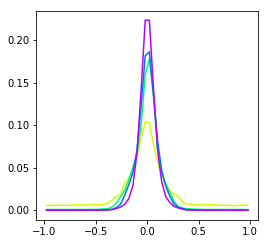

In [ ]:
time_ind_max_flash = 60
stimulus_tag = 'flash'
label = 'MBP'
fig, ax = plt.subplots(1, 1, figsize=(fig_width/1.618, fig_width/1.618))
ax.axis(c='b', lw=2, axisbg='w')
ax.set_facecolor('w')
frames = 1
for i_, flash_duration in enumerate(flash_durations):
    particles = image_duration[stimulus_tag]['result'][label][flash_duration]
    for i, i_frame in  enumerate(range(time_ind_max_flash-frames, time_ind_max_flash+frames-1)):
        if 1:
            v_hist_, x_edges, y_edges = mp.spatial_readout(particles[:, :, i_frame], 
                                                            N_quant_X=N_quant_X, N_quant_Y=1, display=False)
            proba = v_hist_
        else:
            v_hist_, x_edges, y_edges = mp.spatial_readout(particles[:, :, i_frame], 
                                                            N_quant_X=N_quant_X, N_quant_Y=N_quant_Y, display=False)
            proba = v_hist_[:, (N_quant_Y/2-4):(N_quant_Y/2+4)].sum(axis=1)

        x_middle = .5*(x_edges[1:] + x_edges[:-1])
        proba /= proba.sum()
        ax.plot(x_middle, proba, c= plt.cm.hsv((i_+1)/len(flash_durations)), label='T=%.2f' % (flash_duration))

ax.set_xlabel('Space (a.u.)')
ax.set_ylabel('Probability')
if True:
    legend = ax.legend(fontsize='medium', frameon=False)
    frame = legend.get_frame()
    frame.set_facecolor('w')
#ax.set_ylim((0., 0.06))
plt.locator_params(axis = 'x', nbins = 8)
plt.locator_params(axis = 'y', nbins = 5)
plt.tight_layout()
#for ext in FORMATS: fig.savefig(os.path.join('/tmp/', 'FLE_contrast-B' + ext))

In [ ]:
fig = plt.figure(figsize=(3*fig_width, fig_width ))
a = fig.add_subplot(1, 1, 1)
average_std_vec = []
stimulus_tag = 'flash'
for i_, flash_duration in enumerate(flash_durations[:-1]):
    particles = image_duration[stimulus_tag]['result'][label][flash_duration].copy()
    v_hist_, x_edges, y_edges = mp.spatial_readout(particles, N_quant_X=N_quant_Y, N_quant_Y=1, display=False)
    v_hist_ /= np.sum(v_hist_, axis=0)
    B_x = np.zeros(N_frame)
    for t in range(N_frame):

        proba = v_hist_[:, t]
        vonM_mod = Model(model)
        vonM_mod.set_param_hint('A',  value=100, min=0.0)
        vonM_mod.set_param_hint('x_0',  value=x_middle[np.argmax(proba, axis=0)], min=-1.0, max=1.0)
        vonM_mod.set_param_hint('B_x',  value=5.5, min=0.)
        mi = vonM_mod.fit(proba, x=x_middle, method='leastsq')

        B_x[t] = mi.params['B_x'].value 
        
    ind_min = np.argmin(B_x)
    print('Flash occurs at frame ', ind_min)
    average_std_vec.append(B_x)

    a.plot(1/B_x[50:70], alpha=(i_contrast+1)/len(im_contrasts), label='T=%.2f' % (flash_duration))
#    _ = a.plot([ind_min], [1/B_x[ind_min]], 'r*')
legend = a.legend(fontsize='medium', frameon=False, loc='best')
frame = legend.get_frame()
frame.set_facecolor('w')


In [ ]:

len(average_std_vec)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width/2.618, fig_width/2.618))
#fig = plt.figure(figsize=(3*fig_width, fig_width ))
#ax = fig.add_subplot(1, 1, 1)

for i_, flash_duration in enumerate(flash_durations[:-1]):
    average_std = average_std_vec[i_]
    ind_min = np.argmin(average_std)
    print('Max occurs at frame ', ind_min)
    color=(1-i_/4, 0, 0, 1)
    p_offset = 5.7 - i_*.2
    ax.plot(time, average_std**-1, c=(1-i_/4, 0, 0, 1),  label='%d' % (flash_duration*100))
    _ = ax.plot([.59-flash_duration/2, .59+flash_duration/2], [p_offset, p_offset], '-', c=color, lw=2)
    _ = ax.annotate(xytext=(time[ind_min+8]-i_/50, .4 * np.sqrt(20+30*i_)), xy=(time[ind_min], average_std[ind_min]**-1), s=r'$t_{max}=%0.2f$' % (time[ind_min]), color=color,
                   arrowprops=dict(facecolor=color, connectionstyle='arc3,rad=0.3', edgecolor='none', 
                                   headlength=4, headwidth=4, width=1, shrink=-10),
            horizontalalignment='left', verticalalignment='baseline', stretch='extra-condensed', fontsize=10)
for i_, flash_duration in enumerate(flash_durations[:-1]):
    average_std = average_std_vec[i_]
    ind_min = np.argmin(average_std)
    _ = ax.plot(time[ind_min], [average_std[ind_min]**-1], '*', c=color)

if True:
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_smart_bounds(True)
    ax.spines['bottom'].set_smart_bounds(True)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Precision')
#legend = ax.legend(fontsize='small', frameon=False, loc='best')
plt.locator_params(axis = 'x', nbins = 3)
plt.locator_params(axis = 'y', nbins = 5)
#ax.set_yticks=[]
#ax.set_yticklabels=[]
#ax.yaxis.set_ticklabels([])
ax.set_ylim([0., 5.9])
ax.set_xlim([.52, .740])


plt.tight_layout()
fig.subplots_adjust(left=0.21, bottom=0.18, right=.8, top=.97)
for ext in FORMATS: fig.savefig(os.path.join('../figures/', 'FLE_contrast-C' + ext))

## post-prod

In [ ]:
import tikzmagic

In [ ]:
!ls -ltr ../figures/FLE_contrast-*

In [ ]:
%%tikz -e ../figures/FLE_contrast.pdf

\draw[white, fill=white] (-.011\textwidth, 0) rectangle (1.03\textwidth, .7\textwidth) ;
\node [anchor=south west] (label) at ( .01\textwidth, .35\textwidth) {\includegraphics[width=.34\textwidth]{../figures/FLE_contrast-A1.pdf}};
\node [anchor=south west] (label) at ( .355\textwidth, .35\textwidth) {\includegraphics[width=.31\textwidth]{../figures/FLE_contrast-A2.pdf}};
\node [anchor=south west] (label) at ( .67\textwidth, .35\textwidth) {\includegraphics[width=.31\textwidth]{../figures/FLE_contrast-A3.pdf}};
\node [anchor=south west] (label) at (-.02\textwidth, .00\textwidth) {\includegraphics[width=.32\textwidth]{../figures/FLE_contrast-B1.pdf}};
\node [anchor=south west] (label) at ( .31\textwidth, .00\textwidth) {\includegraphics[width=.32\textwidth]{../figures/FLE_contrast-B2.pdf}};
\node [anchor=south west] (label) at ( .66\textwidth, .025\textwidth) {\includegraphics[width=.32\textwidth]{../figures/FLE_contrast-C.pdf}};
\begin{scope}[font=\bf\sffamily]
\draw (-.0\textwidth, .67\textwidth) node {A};
\draw (-.0\textwidth, .33\textwidth) node {B};
\draw (.68\textwidth, .33\textwidth) node {C};
\end{scope}

In [ ]:
!convert -density 600 ../figures/FLE_contrast.pdf ../figures/FLE_contrast.jpg
!convert  -density 600 -resize 5400 -units pixelsperinch -flatten  -compress lzw  -depth 8 ../figures/FLE_contrast.pdf ../figures/FLE_contrast.tiff

from IPython.display import Image
Image('../figures/FLE_contrast.jpg')

## version control

In [ ]:
!git pull

In [ ]:
!git add   ../figures/FLE_contrast* 
#!git rm ../figures/FLE_contrast.svg
!git status

In [ ]:
!git commit -m' figure FLE_contrast : re-running notebook ' ../notebooks/figure_7_FLE_contrast.ipynb  ../figures/FLE_contrast* ; git push

That's all folks!